<a href="https://colab.research.google.com/github/devin-p-quinn/wordle_solver/blob/main/db_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

In [2]:
!pip install sentencepiece

In [3]:
import numpy as np
import spacy
import matplotlib.pyplot as plt
from collections import Counter
import re
import itertools
from transformers import pipeline

In [4]:
with open("slogan_db.txt", "r") as db_file:
    slogan_list = db_file.readlines()

len(slogan_list)

10388

In [5]:
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [6]:
sent_val = []
for slogan in slogan_list:
  obj = sentiment_task(slogan)
  sent_val.append(obj[0]['label'])

len(sent_val)


10388

In [7]:
sent_val[0]

'neutral'

In [8]:
sent_dict = {}

for item in sent_val:
  if item in sent_dict.keys():
    sent_dict[item] = sent_dict[item] + 1
  else:
    sent_dict[item] = 1

In [9]:
sent_dict

{'neutral': 4989, 'negative': 1114, 'positive': 4285}

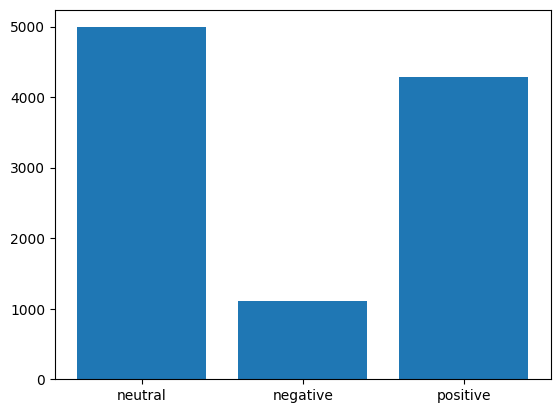

In [10]:
sentiment = list(sent_dict.keys())
freq = list(sent_dict.values())

plt.bar(range(len(sent_dict)), freq, tick_label=sentiment)
plt.show()